# 2 x 2 Multi-Mode Interferometer (MMI) Couplers
Term paper for 6.S976: Silicon Photonics (Fall '22). By Shoumik Chowdhury (@shoumikdc)

In [2]:
""" Import Relevant Packages """
import numpy as np
import matplotlib.pyplot as plt

""" Useful Constants """
π = np.pi;

## System Design

In [3]:
def calculate_W_e(W_M, n_r, n_c, λ0, mode = "TE"):
    """
    Calculate the effective MMI width incorporating Goos-Hanschen shift.
    Ref: Soldano and Pennings (1995).
    """
    σ = 0 if mode == "TE" else 1 # If not TE, assume TM
    
    return W_M + (λ0 / π) * (n_c / n_r)**(2*σ) * (1 / np.sqrt(n_r**2 - n_c**2))

def opt_W_IO(W_e, n_r, λ0, N = 2):
    """
    Calculate optimal in/out waveguide width to MMI.
    Ref: Hosseini et. al. (2010)
    """
    return np.sqrt(λ0 * W_e / n_r) / (2*N)**(1/4)

In [41]:
""" SiN Coupler with Width 2 """

W_M = 2 # [μm]
n_eff0 = 1.571984; n_r = n_eff0
n_eff1 = 1.484411
n_c = 1.45
λ0 = 1.55 # [μm]

W_e = calculate_W_e(W_M, n_r, n_c, λ0, mode = "TE")
print("W_e:", W_e)

g = 2 * W_e / 6
print("g:", g)
print("g/2:", g/2)
print("Opt W_IO:", opt_W_IO(W_e, n_r, λ0))

β_0 = 2*π*n_eff0 / λ0
β_1 = 2*π*n_eff1 / λ0

L_π = π / (β_0 - β_1)
print("L:", L_π / 2)

W_e: 2.8126140183165895
g: 0.9375380061055298
g/2: 0.4687690030527649
Opt W_IO: 1.177556784699907
L: 4.42487981455471


In [35]:
""" SiN Coupler with Width 2.6 """


W_M = 2.6 # [μm]
n_eff0 = 1.583257; n_r = n_eff0
n_eff1 = 1.523332
n_c = 1.45
λ0 = 1.55 # [μm]

W_e = calculate_W_e(W_M, n_r, n_c, λ0, mode = "TE")
print("W_e:", W_e)

g = 2 * W_e / 6
print("g:", g)
print("g/2:", g/2)
print("Opt W_IO:", opt_W_IO(W_e, n_r, λ0))

β_0 = 2*π*n_eff0 / λ0
β_1 = 2*π*n_eff1 / λ0

L_π = π / (β_0 - β_1)
print("L:", L_π / 2)

W_e: 3.3760366018892523
g: 1.125345533963084
g/2: 0.562672766981542
Opt W_IO: 1.2855196398264686
L: 6.466416353775524


In [39]:
""" SiN Coupler with Width 12 (see paper) """

W_M = 12 # [μm]
n_eff0 = 1.602037; n_r = n_eff0
n_eff1 = 1.598385
n_c = 1.45
λ0 = 1.55 # [μm]

W_e = calculate_W_e(W_M, n_r, n_c, λ0, mode = "TE")
print("W_e:", W_e)

g = 2 * W_e / 6
print("g:", g)
print("g/2:", g/2)
print("Opt W_IO:", opt_W_IO(W_e, n_r, λ0))

β_0 = 2*π*n_eff0 / λ0
β_1 = 2*π*n_eff1 / λ0

L_π = π / (β_0 - β_1)
print("L:", L_π / 2)

W_e: 12.724289655579232
g: 4.241429885193077
g/2: 2.1207149425965386
Opt W_IO: 2.4810262175809985
L: 106.10624315443742


In [4]:
""" Si (Silicon) Coupler with Width 2 """

W_M = 2 # [μm]
n_eff0 = 2.826425; n_r = n_eff0
n_eff1 = 2.747702
n_c = 1.45
λ0 = 1.55 # [μm]

W_e = calculate_W_e(W_M, n_r, n_c, λ0, mode = "TE")
print("W_e:", W_e)

g = 2 * W_e / 6
print("g:", g)
print("g/2:", g/2)
print("Opt W_IO:", opt_W_IO(W_e, n_r, λ0))

β_0 = 2*π*n_eff0 / λ0
β_1 = 2*π*n_eff1 / λ0

L_π = π / (β_0 - β_1)
print("L:", L_π / 2)

W_e: 2.203359806296215
g: 0.734453268765405
g/2: 0.3672266343827025
Opt W_IO: 0.7772752331871832
L: 4.922322574088898


In [70]:
L_π

9.844645148177795

## Lumerical FDTD Results

In [24]:
f_TvL = h5py.File('T_vs_L_MMI_FDTD_Mesh3.mat')
f_TvW = h5py.File('T_vs_Wavelength_MMI_FDTD_Mesh3.mat')

Text(0.5, 1.0, 'Sweeping Input Wavelength')

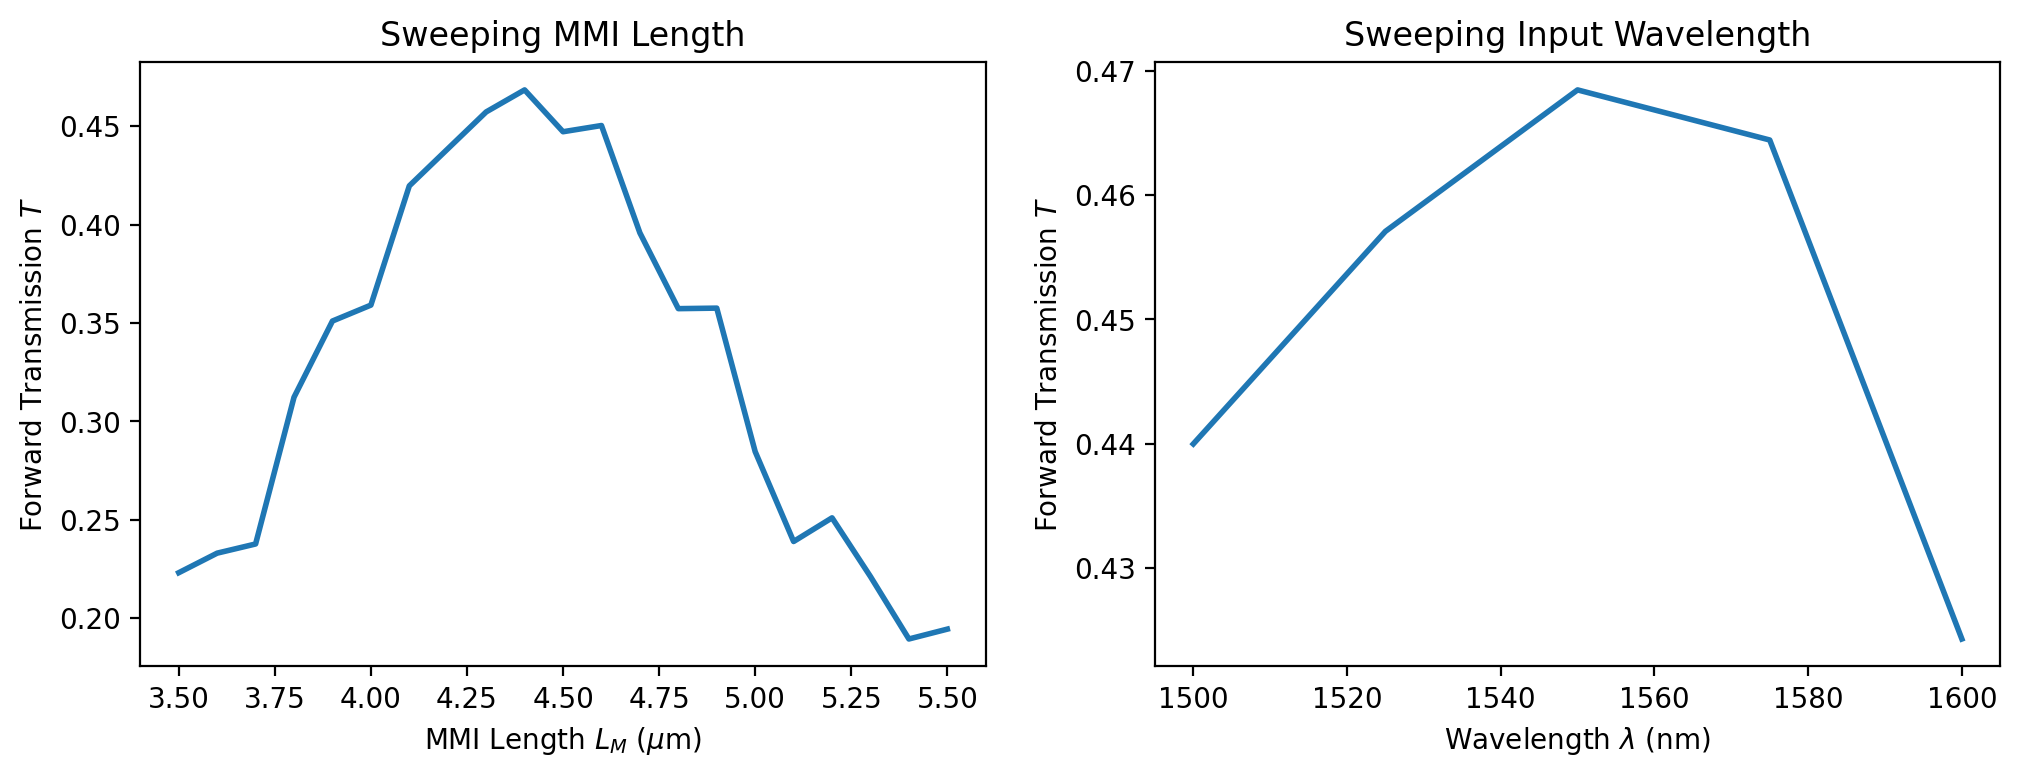

In [71]:
fig, ax = plt.subplots(1, 2, dpi=200, figsize = (12, 4))

# Sweep Transmission vs. MMI Length
ax[0].plot(f_TvL['lum']['x0'], f_TvL['lum']['y0'], '-', linewidth=2)
ax[0].set_xlabel(r"MMI Length $L_M$ ($\mu$m)")
ax[0].set_ylabel(r"Forward Transmission $T$")
ax[0].set_title("Sweeping MMI Length")

# Sweep Transmission vs. Wavelength
ax[1].plot(f_TvW['lum']['x0'], f_TvW['lum']['y0'], '-', linewidth=2)
ax[1].set_ylabel(r"Forward Transmission $T$")
ax[1].set_xlabel(r"Wavelength $\lambda$ (nm)")
ax[1].set_title("Sweeping Input Wavelength")


In [45]:
10 * np.log10(np.array(f_TvL['lum']['y0'])[9])

array([-3.29340633])

In [72]:
np.array(f_TvL['lum']['y0'])[9]

array([0.46844582])

In [68]:
10 * np.log10(np.array(f_TvW['lum']['y0'])[2])

array([-3.29340633])